In [1]:
import pandas as pd
import requests
key_yu ="5032f9a059bda8926e7956544f98bd7c"

# 地理编码/逆地理编码
#### ML/AL思考：在一些比较重要的APP或者小程序（比如i志愿）中用户信息的地址可以采用地理编码的形式，可以有效保护个人地址信息安全

## 地理编码

In [2]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_yu,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()['geocodes'][0]['location']
    return data

In [3]:
 geocode('广东省广州市番禺区大学城')

'113.384598,23.053089'

## 逆地理编码

In [4]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_yu,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [5]:
regeocode('113.384598,23.053089')

{'status': '1',
 'regeocode': {'addressComponent': {'city': '广州市',
   'province': '广东省',
   'adcode': '440113',
   'district': '番禺区',
   'towncode': '440113011000',
   'streetNumber': {'number': '389号',
    'location': '113.383448,23.0528339',
    'direction': '西',
    'distance': '121.036',
    'street': '大学城外环西路'},
   'country': '中国',
   'township': '小谷围街道',
   'businessAreas': [[]],
   'building': {'name': [], 'type': []},
   'neighborhood': {'name': '华南师范大学大学城校区', 'type': '科教文化服务;学校;高等院校'},
   'citycode': '020'},
  'formatted_address': '广东省广州市番禺区小谷围街道华南师范大学大学城校区华南师范大学大学城校区生活北区'},
 'info': 'OK',
 'infocode': '10000'}

# 路径规划
#### ML/AL思考：提供多条路径选择，并且提示哪一条是最短路径

## 步行路径规划

In [6]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_yu,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()['route']['paths'][0]['steps']
    for i in range(0,len(data)):
        print(data[int(i)]['instruction'])


In [7]:
walking(geocode('广东省广州市海珠区中山大学'),geocode('广东省中山大学南方学院'))

沿园西路向南步行191米右转
沿新港西路向西步行22米左转
步行12米左转
沿新港西路向东步行23米右转
沿中央大道北向南步行180米直行
沿中央大道南向南步行90米右转
沿园区横路向西步行119米直行
沿园区西路向西南步行197米向右前方行走
沿园区西路向南步行83米直行
沿晓港东马路向南步行40米直行
沿晓港东三马路向南步行87米右转
沿凤景西路向西步行227米直行
沿南泰路向西步行818米向右前方行走
向西南步行93米向左前方行走
沿江燕路向南步行338米向右前方行走
沿江燕路向南步行443米左转
沿江燕路步行20米右转
步行35米左转
沿燕子岗南路向东南步行281米向右前方行走
沿燕子岗南路向南步行13米直行
沿凤岗路向西南步行68米向右前方行走
沿凤岗路向西南步行34米向左前方行走
沿凤岗路向西南步行280米左转
沿工业大道中向东南步行38米右转
沿石岗路向西南步行986米左转
向南步行93米直行
向南步行1757米直行
向西南步行125米左转
沿工业路向东南步行213米直行
沿沿沙路向东南步行57米直行
沿沿沙东路向东南步行33米直行
沿沿沙路向东南步行1880米右转
沿南桂路步行53米向右前方行走
沿南桂路向西南步行839米左转
向东南步行2094米向右前方行走
沿石北工业路向西步行6米左转
向南步行994米直行
沿钟顺路向南步行3321米向右前方行走
沿兴业大道西步行59米左转
步行30米向右前方行走
沿钟顺路向南步行24米向右前方行走
步行27米左转
沿钟顺路步行30米右转
沿钟顺路向南步行702米直行
沿富石路向南步行122米直行
沿钟顺路向南步行847米直行
沿屏都路向西南步行2722米向左后方行走
沿三桂大道向东南步行888米右转
步行37米右转
沿京古线向南步行559米直行
沿林滘路向东南步行778米向右前方行走
沿林滘路向南步行773米向右前方行走
沿林滘路向东南步行725米右转
沿林滘路向南步行425米左转
沿新碧路向东步行236米右转
沿龙古路向南步行1024米直行
沿908乡道向南步行255米直行
沿古龙公路向南步行438米直行
沿龙古公路向东南步行928米直行
沿龙古路向东南步行594米直行
沿市良路步行91米向右前方行走
沿市良路向西南步行64米
沿市良路向西南步行2702米直行
沿龙洲东路向西南步行1150米左转
沿碧桂路出口

## 公交路线规划

In [8]:
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key_yu,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [9]:
integrated(geocode('广东省广州市海珠区中山大学'),geocode('广东省中山大学南方学院'),'广州','广州')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '5',
 'route': {'origin': '113.291418,23.094611',
  'destination': '113.392782,22.517645',
  'distance': '67786',
  'taxi_cost': '222.36540000000002',
  'transits': [{'cost': '17.0',
    'duration': '11408',
    'nightflag': '0',
    'walking_distance': '2026',
    'distance': '99438',
    'missed': '0',
    'segments': [{'taxi': [],
      'walking': {'origin': '113.291748,23.094280',
       'destination': '113.292862,23.092127',
       'distance': '481',
       'duration': '412',
       'steps': [{'instruction': '沿园西路步行191米左转',
         'road': '园西路',
         'distance': '191',
         'duration': [],
         'polyline': '113.291748,23.094280;113.291679,23.094006;113.291618,23.093763;113.291458,23.093172;113.291420,23.093021;113.291389,23.092873;113.291313,23.092590',
         'action': '左转',
         'assistant_action': []},
        {'instruction': '沿新港西路步行81米左转',
         'road': '新港西路',
         'distance': '81',
   

# 行政区域查询
#### ML/AL思考：根据用户的输入快速查找特定的行政区域信息。

In [101]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_yu,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()['districts'][0]['districts']
    for i in data:
        print(i['name'])
    return 

In [11]:
district('广州')

从化区
南沙区
花都区
番禺区
荔湾区
海珠区
白云区
增城区
黄埔区
天河区
越秀区


# 搜索POI

#### ML/AL思考：多种搜索方式可使用户筛选自己想要的地方。能够筛选“附近美食”

## 关键字搜索

In [12]:
def keyword(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_yu,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()['pois']
   
    return data

In [13]:
keyword('大学','高等院校','广州市')

[{'id': 'B00140458B',
  'parent': [],
  'childtype': [],
  'name': '广东工业大学(龙洞校区)',
  'type': '科教文化服务;学校;高等院校',
  'typecode': '141201',
  'biz_type': [],
  'address': '迎龙路161号',
  'location': '113.359713,23.19677',
  'tel': '020-87082921',
  'distance': [],
  'biz_ext': [],
  'pname': '广东省',
  'cityname': '广州市',
  'adname': '天河区',
  'importance': [],
  'shopid': [],
  'shopinfo': '0',
  'poiweight': [],
  'photos': []},
 {'id': 'B0FFFFQZDE',
  'parent': [],
  'childtype': [],
  'name': '广州医科大学越秀校区',
  'type': '科教文化服务;学校;高等院校',
  'typecode': '141201',
  'biz_type': [],
  'address': '东风西路195号',
  'location': '113.256131,23.134038',
  'tel': '020-81340278;020-81340448',
  'distance': [],
  'biz_ext': [],
  'pname': '广东省',
  'cityname': '广州市',
  'adname': '越秀区',
  'importance': [],
  'shopid': [],
  'shopinfo': '0',
  'poiweight': [],
  'photos': []},
 {'id': 'B00141IHRZ',
  'parent': 'B0FFIGLX5N',
  'childtype': '309',
  'name': '中山大学广州校区南校园',
  'type': '科教文化服务;学校;高等院校',
  'typecode': '141

## 周边搜索

In [14]:
def range(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_yu,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [15]:
range('113.384598,23.053089')

{'status': '1',
 'count': '875',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFF5UWQV',
   'parent': 'B00140KZTG',
   'childtype': '309',
   'name': '华南师范大学大学城校区生活北区',
   'type': '商务住宅;住宅区;宿舍',
   'typecode': '120303',
   'biz_type': [],
   'address': '外环西路378号华南师范大学大学城校区外环西路387附近',
   'location': '113.384518,23.053643',
   'tel': [],
   'distance': '62',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFFGVOBD',
   'parent': 'B00140KZTG',
   'childtype': '309',
   'name': '华南师范大学大学城校区学北',
   'type': '商务住宅;住宅区;宿舍',
   'typecode': '120303',
   'biz_type': [],
   'address': '外环西路378号华南师范大学大学城校区星海东路附近',
   'location': '113.385649,23.053198',
   'tel': [],
   'distance': '108',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFMDHSCU',
   'parent': [],
   'childtype': [],
   'n

## 多边形搜索


In [97]:
def more(polygon,keywords=None,types=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/polygon?parameters '
    params={
        'key':key_yu,
        'keywords':keywords,
        'types':types,
        'polygon':polygon,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [98]:
more('116.460988,40.006919|116.48231,40.007381;116.47516,39.99713|116.472596,39.985227|116.45669,39.984989|116.460988,40.006919')

{'status': '1',
 'count': '879',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'BV10013356',
   'parent': [],
   'childtype': [],
   'name': '望京(地铁站)',
   'type': '交通设施服务;地铁站;地铁站',
   'typecode': '150500',
   'biz_type': [],
   'address': '14号线东段;15号线',
   'location': '116.469409,39.998521',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '北京市',
   'cityname': '北京市',
   'adname': '朝阳区',
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'BV10416592',
   'parent': [],
   'childtype': [],
   'name': '阜通(地铁站)',
   'type': '交通设施服务;地铁站;地铁站',
   'typecode': '150500',
   'biz_type': [],
   'address': '14号线东段',
   'location': '116.471740,39.991699',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '北京市',
   'cityname': '北京市',
   'adname': '朝阳区',
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'B000A7W4

# IP定位
#### ML/AL思考：
#### 1.能够将IP信息转换为地理位置信息。用户可以实时知道自己的位置。
#### 2.救护车能够根据电话ip找到打120的人             

In [34]:
def ip(ip,sig=None)->dict:   
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key': key_yu,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)  
    data = response.json()    
    return data

In [35]:
ip('1.184.0.0')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '广东省',
 'city': '广州市',
 'adcode': '440100',
 'rectangle': '113.1017375,22.93212254;113.6770499,23.3809537'}

# 批量请求接口
#### ML/AL思考：合并请求，节省时间。可用于旅游地点攻略

In [42]:
def request()->dict:
    params={
        'key': key_yu,
    }
    
    body={
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=5032f9a059bda8926e7956544f98bd7c&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=5032f9a059bda8926e7956544f98bd7c&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]
}
    response = requests.get("https://restapi.amap.com/v3/batch?",params=params,json=body)  
    data = response.json()    
    return data

In [40]:
request()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

# 静态地图
#### ML/AL思考：知道自己的位置，以及与周边的大概距离，可以定位两个人之间的距离，方便朋友会面

In [18]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_yu,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

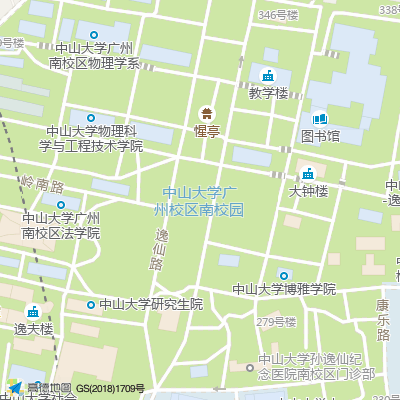

In [19]:
staticmap('113.298415,23.096714','16')

# 坐标转换
#### ML/AL思考：能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。当你朋友发给你的坐标不是高德坐标时，你可以进行转换。

In [20]:
def sit(locations,coordsys,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key_yu,
        'locations':locations,
        'coordsys':coordsys,
        'sig':sig, 
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [21]:
sit('116.481499,39.990475|116.481499,39.990375','gps')

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '116.487585177952,39.991754014757;116.487585177952,39.991653917101'}

# 天气查询
#### ML/AL思考：查询实时天气，预告天气状况，提醒用户防晒或者防寒等

In [22]:
def weather(city,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key_yu,
        'city':city,
        
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [23]:
weather('汕头市')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '汕头市',
   'adcode': '440500',
   'weather': '雨',
   'temperature': '18',
   'winddirection': '东',
   'windpower': '≤3',
   'humidity': '99',
   'reporttime': '2020-04-22 21:52:34'}]}

# 输入提示
#### ML/AL思考：提供根据用户输入的关键词查询返回建议列表。根据关键字进行推送

In [24]:
def tip(keywords,types,location,city=None,citylimit=None,sig=None,datatype=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':key_yu,
        'keywords':keywords,
        'type':types,
        'city':city,
        'citylimit':citylimit,
        'location':location,
        'sig':sig,
        'datatype':datatype,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [25]:
tip('肯德基','050301','116.481488,39.990464',"郑州市")

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '肯德基',
   'district': [],
   'adcode': [],
   'location': [],
   'address': [],
   'typecode': [],
   'city': []},
  {'id': 'B017319Q1M',
   'name': '肯德基(东风路店)',
   'district': '河南省郑州市金水区',
   'adcode': '410105',
   'location': '113.657943,34.799826',
   'address': '东风路明天·财智名座1层',
   'typecode': '050301',
   'city': []},
  {'id': 'B01730ICG8',
   'name': '肯德基(经三路店)',
   'district': '河南省郑州市金水区',
   'adcode': '410105',
   'location': '113.692164,34.788034',
   'address': '经三路北46号华润万家经三路店1-2层',
   'typecode': '050301',
   'city': []},
  {'id': 'B0FFF4L3GU',
   'name': '肯德基(众意店)',
   'district': '河南省郑州市金水区',
   'adcode': '410105',
   'location': '113.722395,34.777904',
   'address': '商务外环路与众意路交叉口丹尼斯百货七天地1-2层',
   'typecode': '050301',
   'city': []},
  {'id': 'B0FFF90S9A',
   'name': '肯德基(东站一餐厅)',
   'district': '河南省郑州市金水区',
   'adcode': '410105',
   'location': '113.777769,34.759480',
   '

# 交通态势

#### ML/AL思考：能够确定矩形、圆形或某条道路的交通态势情况，路况信息2分钟更新一次，结合路径规划为用户提供路线。帮助用户节省时间。

## 矩形区域交通态势

In [26]:
def quer(rectangle,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':key_yu,
        'level':level,
        'rectangle':rectangle,
        'sig':sig,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [27]:
quer('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

## 圆形区域交通态势


In [28]:
def circular(location,radius=None,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/circle?parameters'
    params={
        'key':key_yu,
        'level':level,
        'location':location,
        'radius':radius,
        'sig':sig,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [29]:
circular('116.3057764,39.98641364',radius='1500')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '善缘街：自东向西缓慢，北四环西路附近自北向南严重拥堵；海淀大街：中钢国际广场附近自西向东行驶缓慢。',
  'evaluation': {'expedite': '93.44%',
   'congested': '4.92%',
   'blocked': '1.64%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

## 指定线路交通态势


In [30]:
def appoint(name,adcode,city=None,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/road?parameters'
    params={
        'key':key_yu,
        'level':level,
        'name':name,
        'city':city,
        'adcode':adcode,
        'sig':sig,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [31]:
appoint('北环大道','440300')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北环大道：北环沙河西立交附近自西向东严重拥堵，银湖立交附近自西向东严重拥堵。',
  'evaluation': {'expedite': '96.94%',
   'congested': '0.00%',
   'blocked': '3.06%',
   'unknown': '0.00%',
   'status': '1',
   'description': '畅通'}}}

# 地理围栏

#### ML/AL思考：学生在学校上课签到打卡，车辆是否乱入盲人道

## 创建地理围栏

In [61]:
def create(name="测试围栏名称",center= "115.672126,38.817129",radius= "1000",valid_time= "2020-04-22",desc="测试围栏描述"):
    
    params={
        'key':key_yu,
    }
    
    body={
        "name": name,
        "center": center,
        "radius": "1000",
        "enable": "true",
        "valid_time": "2020-04-22",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏描述",
        "alert_condition": "enter;leave"
}
    response = requests.post("https://restapi.amap.com/v4/geofence/meta",params=params,json=body)
    data = response.json()
    return data


In [62]:
create(name="围栏",center=geocode("汕头大学"))

{'data': {'gid': 'fac1d74d-05d0-47d1-895d-f55873c52207',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 查询围栏


In [87]:
def query():
    params={
        'key':key_yu,
    }
    
    body={
        "name": "围栏"
       
    }
    
    response = requests.get("https://restapi.amap.com/v4/geofence/meta",params=params,json=body)
    data = response.json()
    return data
   

In [89]:
query()

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': 'enter;leave',
    'center': '116.631809,23.412536',
    'create_time': '2020-04-22 22:45:47',
    'enable': True,
    'fixed_date': '',
    'gid': 'fac1d74d-05d0-47d1-895d-f55873c52207',
    'id': '0',
    'key': '5032f9a059bda8926e7956544f98bd7c',
    'name': '围栏',
    'points': '',
    'radius': 1000.0,
    'repeat': 'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time': '00:00,11:59;13:00,20:59',
    'valid_time': '2020-04-22'}],
  'total_record': 1},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 轨迹纠偏
#### ML/AL思考：提醒用户走错路，为用户重新规划路线

In [93]:
def locus():
    params={
        'key':key_yu,
    }
    body = [
         {
        "x": 116.449429,
        "y": 40.014844,
        "sp": 4,
        "ag": 110,
        "tm": 1478831753
        }, 
         {
        "x": 116.449639,
        "y": 40.014776,
        "sp": 3,
        "ag": 110,
        "tm": 23
        }, 
         {
        "x": 116.449859,
        "y": 40.014716,
        "sp": 3,
        "ag": 111,
        "tm": 33
        }, 
         {
        "x": 116.450074,
        "y": 40.014658,
        "sp": 3,
        "ag": 110,
        "tm": 31
        }, 
         {
        "x": 116.450273,
        "y": 40.014598,
        "sp": 3,
        "ag": 111,
        "tm": 20
        }]
        
    response = requests.get("https://restapi.amap.com/v4/grasproad/driving",params=params,json=body)
    data = response.json()
    return data
          
        

In [94]:
locus()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 设计应用 --《电影片场探班指南》

### 一，所用API：
    
* 路径规划

* IP定位

* 交通态势

* 天气查询

* 输入提示

* 地理围栏

### 二，产品用户：

* 喜欢看电影、追星、喜欢看风景的青年

### 三，产品需求：

* 对于这一部分的产品用户提供专门的App，满足他们对于电影的热爱。
* 电影拍摄的地点通常是风景优美的，满足不少用户对于电影中美景的向往。
* 满足追星族对于偶像的近距离接触。

### 四，产品描述：

* 用户可以通过IP定位知道某个片场的位置，以路径规划和交通态势为用户前往片场设计出最合理的路线。
* 天气查询能够使用户实时知道片场的天气而不用因为天气原因而白跑。
* 输入提示可以为用户筛选其想探班的电影名称，明星以及片场地点。
* 地理围栏则是为了提示用户哪些地方可以站在那里观看，哪些地方是不允许有人走动。

